System requirements

* Python 3.5 or higher
* Scipy/numpy
* Paranoid scientist (pip install paranoid-scientist)
* For plotting features, matplotlib
* For parallelization support, pathos

## Hello World!


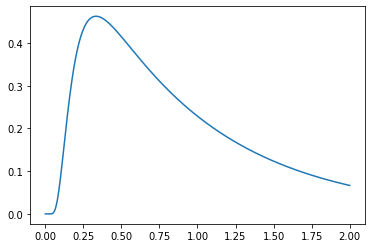

In [2]:
import matplotlib.pyplot as plt
from ddm import Model
m = Model()
s = m.solve()
plt.plot(s.model.t_domain(), s.pdf_corr())
plt.savefig("helloworld.png")
plt.show()

In [4]:
s.model

Model(name='', drift=DriftConstant(drift=0), noise=NoiseConstant(noise=1), bound=BoundConstant(B=1), IC=ICPointSourceCenter(), overlay=OverlayNone(), dx=0.005, dt=0.005, T_dur=2.0)

In [6]:
help(Model)

Help on class Model in module ddm.model:

class Model(builtins.object)
 |  Model(drift=DriftConstant(drift=0), noise=NoiseConstant(noise=1), bound=BoundConstant(B=1), IC=ICPointSourceCenter(), overlay=OverlayNone(), name='', dx=0.005, dt=0.005, T_dur=2.0, fitresult=None)
 |  
 |  A full simulation of a single DDM-style model.
 |  
 |  Each model simulation depends on five key components:
 |  
 |  - A description of how drift rate (drift) changes throughout the simulation.
 |  - A description of how variability (noise) changes throughout the simulation.
 |  - A description of how the boundary changes throughout the simulation.
 |  - Starting conditions for the model
 |  - Specific details of a task which cause dynamic changes in the model (e.g. a stimulus intensity change)
 |  
 |  This class manages these, and also provides the affiliated
 |  services, such as analytical or numerical simulations of the
 |  resulting reaction time distribution.
 |  
 |  Methods defined here:
 |  
 |  IC

In [7]:
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision
from ddm.functions import fit_adjust_model, display_model

model = Model(name='Simple model',
              drift=DriftConstant(drift=2.2),
              noise=NoiseConstant(noise=1.5),
              bound=BoundConstant(B=1.1),
              overlay=OverlayNonDecision(nondectime=.1),
              dx=.001, dt=.01, T_dur=2)
display_model(model)
sol = model.solve()

Model Simple model information:
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 2.200000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.100000



In [8]:
samp = sol.resample(1000)

In [9]:
from ddm import Fittable
from ddm.models import LossRobustBIC
from ddm.functions import fit_adjust_model
model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=4)),
                  noise=NoiseConstant(noise=Fittable(minval=.5, maxval=4)),
                  bound=BoundConstant(B=1.1),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.001, dt=.01, T_dur=2)

fit_adjust_model(samp, model_fit,
                 fitting_method="differential_evolution",
                 lossfunction=LossRobustBIC, verbose=False)

Params [2.27693733 1.51047783 0.11324672] gave 423.26628146043083


Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(2.276937328188291, minval=0, maxval=4)), noise=NoiseConstant(noise=Fitted(1.5104778270785275, minval=0.5, maxval=4)), bound=BoundConstant(B=1.1), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.11324671945877413, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=2, fitresult=FitResult(fitting_method='differential_evolution', method='auto', loss='BIC', value=423.26628146043083, nparams=3, samplesize=1000, mess=''))

In [10]:
display_model(model_fit)

Model Simple model (fitted) information:
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 2.276937
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 1.510478
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.113247
Fit information:
    Loss function: BIC
    Loss function value: 423.26628146043083
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 3
        - samplesize: 1000
        - mess: ''



In [11]:
samp

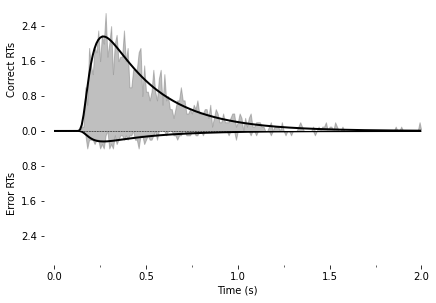

In [12]:
import ddm.plot
import matplotlib.pyplot as plt
ddm.plot.plot_fit_diagnostics(model=model_fit, sample=samp)
plt.savefig("simple-fit.png")
plt.show()

In [13]:
print(sol.prob_correct())
print(sol.pdf_err())

0.8937015385162344
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.07365499e-10
 5.00458955e-05 2.38145936e-03 1.43848498e-02 3.90619605e-02
 7.20389916e-02 1.07279501e-01 1.40406765e-01 1.69113545e-01
 1.92585355e-01 2.10874478e-01 2.24459235e-01 2.33980790e-01
 2.40101611e-01 2.43437087e-01 2.44527962e-01 2.43834117e-01
 2.41738697e-01 2.38556580e-01 2.34544091e-01 2.29908443e-01
 2.24816229e-01 2.19400774e-01 2.13768322e-01 2.08003174e-01
 2.02171914e-01 1.96326847e-01 1.90508801e-01 1.84749393e-01
 1.79072854e-01 1.73497511e-01 1.68036971e-01 1.62701084e-01
 1.57496705e-01 1.52428321e-01 1.47498541e-01 1.42708501e-01
 1.38058181e-01 1.33546658e-01 1.29172320e-01 1.24933024e-01
 1.20826228e-01 1.16849097e-01 1.12998587e-01 1.09271511e-01
 1.05664589e-01 1.02174491e-01 9.87978738e-02 9.55313982e-02
 9.23717551e-02 8.93156782e-02 8.63599563e-02 8.35014413e-02
 8.07

In [15]:
from ddm import Sample
import pandas
df_rt = pandas.read_csv("https://raw.githubusercontent.com/mwshinn/PyDDM/master/doc/downloads/roitman_rts.csv")
df_rt

,monkey,rt,coh,correct,trgchoice
0,1,0.355,0.512,1.0,2.0
1,1,0.359,0.256,1.0,1.0
2,1,0.525,0.128,1.0,1.0
3,1,0.332,0.512,1.0,1.0
4,1,0.302,0.032,0.0,2.0
...,...,...,...,...,...
6144,2,0.627,0.032,1.0,1.0
6145,2,0.581,0.256,1.0,1.0
6146,2,0.293,0.512,1.0,1.0
6147,2,0.373,0.128,1.0,2.0


In [16]:
df_rt = df_rt[df_rt["monkey"] == 1] # Only monkey 1
  
# Remove short and long RTs, as in 10.1523/JNEUROSCI.4684-04.2005.
# This is not strictly necessary, but is performed here for
# compatibility with this study.
df_rt = df_rt[df_rt["rt"] > .1] # Remove trials less than 100ms
df_rt = df_rt[df_rt["rt"] < 1.65] # Remove trials greater than 1650ms
  
# Create a sample object from our data.  This is the standard input
# format for fitting procedures.  Since RT and correct/error are
# both mandatory columns, their names are specified by command line
# arguments.
roitman_sample = Sample.from_pandas_dataframe(df_rt, rt_column_name="rt", correct_column_name="correct")


In [17]:
import ddm.models
class DriftCoherence(ddm.models.Drift):
    name = "Drift depends linearly on coherence"
    required_parameters = ["driftcoh"] # <-- Parameters we want to include in the model
    required_conditions = ["coh"] # <-- Task parameters ("conditions"). Should be the same name as in the sample.
    
    # We must always define the get_drift function, which is used to compute the instantaneous value of drift.
    def get_drift(self, conditions, **kwargs):
        return self.driftcoh * conditions['coh']

In [18]:
from ddm import Model, Fittable
from ddm.functions import fit_adjust_model, display_model
from ddm.models import NoiseConstant, BoundConstant, OverlayChain, OverlayNonDecision, OverlayPoissonMixture
model_rs = Model(name='Roitman data, drift varies with coherence',
                 drift=DriftCoherence(driftcoh=Fittable(minval=0, maxval=20)),
                 noise=NoiseConstant(noise=1),
                 bound=BoundConstant(B=Fittable(minval=.1, maxval=1.5)),
                 # Since we can only have one overlay, we use
                 # OverlayChain to string together multiple overlays.
                 # They are applied sequentially in order.  OverlayNonDecision
                 # implements a non-decision time by shifting the
                 # resulting distribution of response times by
                 # `nondectime` seconds.
                 overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fittable(minval=0, maxval=.4)),
                                                OverlayPoissonMixture(pmixturecoef=.02,
                                                                      rate=1)]),
                 dx=.001, dt=.01, T_dur=2)

# Fitting this will also be fast because PyDDM can automatically
# determine that DriftCoherence will allow an analytical solution.
fit_model_rs = fit_adjust_model(sample=roitman_sample, model=model_rs, verbose=False)

Params [10.36415557  0.74406192  0.3119136 ] gave 199.33384553433308


In [19]:
display_model(fit_model_rs)

Model Roitman data, drift varies with coherence information:
Drift component DriftCoherence:
    Drift depends linearly on coherence
    Fitted parameters:
    - driftcoh: 10.364156
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fitted parameters:
    - B: 0.744062
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fitted parameters:
        - nondectime: 0.311914
    Overlay component OverlayPoissonMixture:
        Poisson distribution mixture model (lapse rate)
        Fixed parameters:
        - pmixturecoef: 0.020000
        - rate: 1.000000
Fit information:
    Loss function: Negative log likelihood
    Loss function value: 199.33384553433308
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - n

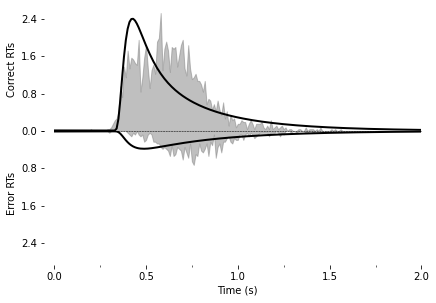

In [20]:
import ddm.plot
import matplotlib.pyplot as plt
ddm.plot.plot_fit_diagnostics(model=fit_model_rs, sample=roitman_sample)
plt.savefig("roitman-fit.png")
plt.show()

In [21]:
ddm.plot.model_gui(model=fit_model_rs, sample=roitman_sample)

TclError: no display name and no $DISPLAY environment variable

In [22]:
class DriftCoherenceLeak(ddm.models.Drift):
    name = "Leaky drift depends linearly on coherence"
    required_parameters = ["driftcoh", "leak"] # <-- Parameters we want to include in the model
    required_conditions = ["coh"] # <-- Task parameters ("conditions"). Should be the same name as in the sample.
    
    # We must always define the get_drift function, which is used to compute the instantaneous value of drift.
    def get_drift(self, x, conditions, **kwargs):
        return self.driftcoh * conditions['coh'] + self.leak * x

In [23]:
from ddm.models import BoundCollapsingExponential
model_leak = Model(name='Roitman data, leaky drift varies with coherence',
                   drift=DriftCoherenceLeak(driftcoh=Fittable(minval=0, maxval=20),
                                            leak=Fittable(minval=-10, maxval=10)),
                   noise=NoiseConstant(noise=1),
                   bound=BoundCollapsingExponential(B=Fittable(minval=0.5, maxval=3),
                                                    tau=Fittable(minval=.0001, maxval=5)),
                   # Since we can only have one overlay, we use
                   # OverlayChain to string together multiple overlays.
                   # They are applied sequentially in order.  OverlayDelay
                   # implements a non-decision time by shifting the
                   # resulting distribution of response times by
                   # `delaytime` seconds.
                   overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fittable(minval=0, maxval=.4)),
                                                  OverlayPoissonMixture(pmixturecoef=.02,
                                                                        rate=1)]),
                   dx=.01, dt=.01, T_dur=2)

In [24]:
from ddm.plot import model_gui
model_gui(model_leak, sample=roitman_sample)

TclError: no display name and no $DISPLAY environment variable

In [25]:
fit_model_leak = fit_adjust_model(sample=roitman_sample, model=model_leak)
ddm.plot.plot_fit_diagnostics(model=fit_model_leak, sample=roitman_sample)
plt.savefig("leak-collapse-fit.png")

Model(name='Roitman data, leaky drift varies with coherence', drift=DriftCoherenceLeak(driftcoh=Fitted(9.542903321809481, minval=0, maxval=20), leak=Fitted(1.7326521345463863, minval=-10, maxval=10)), noise=NoiseConstant(noise=1), bound=BoundCollapsingExponential(B=Fitted(0.6897102161309165, minval=0.5, maxval=3), tau=Fitted(2.3832278058729726, minval=0.0001, maxval=5)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.35096334903519405, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=2) loss=1967.1418614641623
Model(name='Roitman data, leaky drift varies with coherence', drift=DriftCoherenceLeak(driftcoh=Fitted(7.177639592668301, minval=0, maxval=20), leak=Fitted(9.110567517297387, minval=-10, maxval=10)), noise=NoiseConstant(noise=1), bound=BoundCollapsingExponential(B=Fitted(2.142464682107733, minval=0.5, maxval=3), tau=Fitted(0.9120053245906932, minval=0.0001, maxval=5)), IC=ICPointSo

PyDDM can simulate models and generate artificial data, or it can fit them to data. Below are high-level overviews for how to accomplish each.

To simulate models and generate artificial data:

Optionally, define unique components of your model. Models are modular, and allow specifying a dynamic drift rate, noise level, diffusion bounds, starting position of the integrator, or post-simulation modifications to the RT histogram. Many common models for these are included by default, but for advance functionality you may need to subclass Drift, Noise, Bound, InitialCondition, or Overlay. These model components may depend on “conditions”, i.e. prespecified values associated with the behavioral task which change from trial to trial (e.g. stimulus coherence), or “parameters”, i.e. values which apply to all trials and should be fit to the subject.
Define a model. Models are represented by creating an instance of the Model class, and specifying the model components to use for it. These model component can either be the model components included in PyDDM or ones you created in step 1. Values must be specified for all parameters required by model components.
Simulate the model using the Model.solve() method to generate a Solution object. If you have multiple conditions, you must run Model.solve() separately for each set of conditions and generate separate Solution objects.
Run the Solution.resample() method of the Solution object to generate a Sample. If you have multiple Solution objects (for multiple task conditions), you will need to generate multiple Sample objects as well. These can be added together with the “+” operator to form one single Sample object.